# Tratamento da base de dados

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [75]:
base_credit = pd.read_csv('credit_card_clients.csv', header = 1)
base_credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [76]:
base_credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [77]:
base_credit.drop(columns = ['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month'], axis = 1, inplace = True)
base_credit

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,41,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [78]:
base_credit['BILL_TOTAL'] = base_credit['BILL_AMT1'] + base_credit['BILL_AMT2'] + base_credit['BILL_AMT3'] + base_credit['BILL_AMT4'] + base_credit['BILL_AMT5'] + base_credit['BILL_AMT6']
base_credit['PAY_TOTAL'] = base_credit['PAY_AMT1'] + base_credit['PAY_AMT2'] + base_credit['PAY_AMT3'] + base_credit['PAY_AMT4'] + base_credit['PAY_AMT5'] + base_credit['PAY_AMT6']
base_credit

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_TOTAL,PAY_TOTAL
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,7704,689
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,17077,5000
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,101653,11018
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,231334,8388
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,109339,59049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,725349,42550
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,21182,14490
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,70496,31300
29998,80000,41,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,266611,147181


In [79]:
base_credit.drop(columns = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',], axis = 1, inplace = True)
base_credit

,LIMIT_BAL,AGE,BILL_TOTAL,PAY_TOTAL
0,20000,24,7704,689
1,120000,26,17077,5000
2,90000,34,101653,11018
3,50000,37,231334,8388
4,50000,57,109339,59049
...,...,...,...,...
29995,220000,39,725349,42550
29996,150000,43,21182,14490
29997,30000,37,70496,31300
29998,80000,41,266611,147181


In [80]:
base_credit.describe()

,LIMIT_BAL,AGE,BILL_TOTAL,PAY_TOTAL
count,30000.000000,30000.000000,3.000000e+04,3.000000e+04
mean,167484.322667,35.485500,2.698617e+05,3.165139e+04
std,129747.661567,9.217904,3.795643e+05,6.082768e+04
min,10000.000000,21.000000,-3.362590e+05,0.000000e+00
25%,50000.000000,28.000000,2.868800e+04,6.679750e+03
50%,140000.000000,34.000000,1.263110e+05,1.438300e+04
75%,240000.000000,41.000000,3.426265e+05,3.350350e+04
max,1000000.000000,79.000000,5.263883e+06,3.764066e+06


In [81]:
base_credit.isnull().sum()

LIMIT_BAL     0
AGE           0
BILL_TOTAL    0
PAY_TOTAL     0
dtype: int64

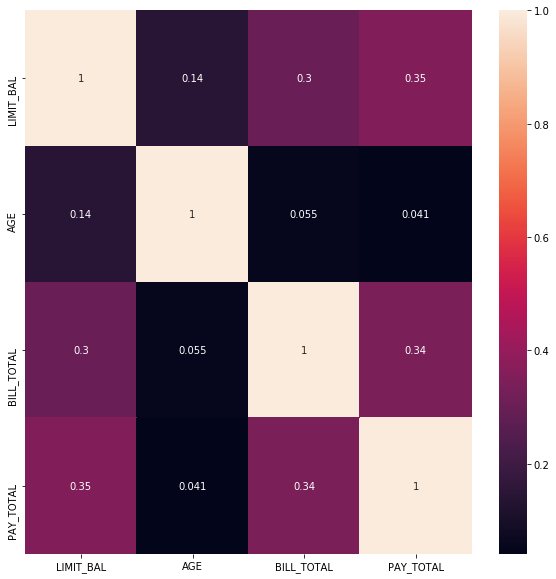

In [82]:
figura = plt.figure(figsize=(10,10))
sns.heatmap(base_credit.corr(), annot=True);

In [83]:
base_treinamento = base_credit.iloc[0:21000,:]
base_treinamento.shape

(21000, 4)

In [84]:
base_teste = base_credit.iloc[21000:,:]
base_teste.shape

(9000, 4)

In [85]:
X_teste = base_teste.iloc[:,1:4].values
X_teste

array([[     36,    2730,    1950],
       [     40, 1123822,   48312],
       [     37,  321368,   24884],
       ...,
       [     37,   70496,   31300],
       [     41,  266611,  147181],
       [     46,  230874,    8308]], dtype=int64)

In [103]:
y_teste = base_teste.iloc[:, 0].values
y_teste

array([ 30000, 280000, 260000, ...,  30000,  80000,  50000], dtype=int64)

In [87]:
base_treinamento.to_csv('credit_card_train_xgboost.csv', header = False, index = False)
base_teste.to_csv('credit_card_test_xgboost.csv', header = False, index = False)

# Configurações SageMaker

In [88]:
import sagemaker
import boto3
from sagemaker import Session

In [89]:
session = sagemaker.Session()
bucket = 'cursoawssagemaker'
subpasta_modelo = 'modelos/credit-card/xgboost'
subpasta_dataset = 'datasets/credit-card'
key_train = 'credit-card-train-data-xgboost'
key_test = 'credit-card-test-data-xgboost'
role = sagemaker.get_execution_role()
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, subpasta_dataset, key_train)
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, subpasta_dataset, key_test)
output_location = 's3://{}/{}/output'.format(bucket, subpasta_modelo)
print('Role: {}'.format(role))
print('Localização da base de treinamento: {}'.format(s3_train_data))
print('Localização da base de teste: {}'.format(s3_test_data))
print('Modelo final será salvo em: {}'.format(output_location))

Role: arn:aws:iam::936535973187:role/service-role/AmazonSageMaker-ExecutionRole-20220510T125992
Localização da base de treinamento: s3://cursoawssagemaker/datasets/credit-card/train/credit-card-train-data-xgboost
Localização da base de teste: s3://cursoawssagemaker/datasets/credit-card/test/credit-card-test-data-xgboost
Modelo final será salvo em: s3://cursoawssagemaker/modelos/credit-card/xgboost/output


In [90]:
with open('credit_card_train_xgboost.csv', 'rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(subpasta_dataset, 'train', key_train)).upload_fileobj(f)

In [91]:
with open('credit_card_test_xgboost.csv', 'rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(subpasta_dataset, 'test', key_test)).upload_fileobj(f)

# Treinamento do XGBoost

In [92]:
# https://docs.aws.amazon.com/sagemaker/latest/dg/ecr-sa-east-1.html
from sagemaker import image_uris
container = image_uris.retrieve(framework = 'xgboost', region=boto3.Session().region_name, version='latest')

In [93]:
# https://sagemaker.readthedocs.io/en/stable/api/training/estimators.html
xgboost = sagemaker.estimator.Estimator(image_uri = container,
                                        role = role,
                                        instance_count = 1,
                                        instance_type = 'ml.m5.2xlarge',
                                        output_path = output_location,
                                        sagemaker_session = session)

In [94]:
# https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost_hyperparameters.html
xgboost.set_hyperparameters(num_round = 100)

In [95]:
train_input = sagemaker.inputs.TrainingInput(s3_data = s3_train_data, content_type='csv', s3_data_type = 'S3Prefix')
validation_input = sagemaker.inputs.TrainingInput(s3_data = s3_test_data, content_type='csv', s3_data_type = 'S3Prefix')
data_channels = {'train': train_input, 'validation': validation_input}

In [96]:
xgboost.fit(data_channels)

2022-05-19 17:36:39 Starting - Starting the training job...
2022-05-19 17:37:02 Starting - Preparing the instances for trainingProfilerReport-1652981799: InProgress
.........
2022-05-19 17:38:38 Downloading - Downloading input data...
2022-05-19 17:38:58 Training - Downloading the training image...
2022-05-19 17:39:38 Uploading - Uploading generated training modelArguments: train
[2022-05-19:17:39:24:INFO] Running standalone xgboost training.
[2022-05-19:17:39:24:INFO] File size need to be processed in the node: 0.62mb. Available memory size in the node: 23814.52mb
[2022-05-19:17:39:24:INFO] Determined delimiter of CSV input is ','
[17:39:24] S3DistributionType set as FullyReplicated
[17:39:24] 21000x3 matrix with 63000 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2022-05-19:17:39:24:INFO] Determined delimiter of CSV input is ','
[17:39:24] S3DistributionType set as FullyReplicated
[17:39:24] 9000x3 matrix with 27000 entries loaded from /opt/ml/in

# Deploy, previsões e avaliação

In [97]:
xgboost_regressor = xgboost.deploy(initial_instance_count = 1, instance_type = 'ml.m4.xlarge')

------!

In [99]:
from sagemaker.serializers import CSVSerializer
xgboost_regressor.serializer = CSVSerializer()

In [100]:
X_teste.shape, type(X_teste)

((9000, 3), numpy.ndarray)

In [101]:
previsoes = np.array(xgboost_regressor.predict(X_teste).decode('utf-8').split(',')).astype(np.float32)
previsoes

array([146657.6 , 253815.53, 190900.72, ..., 199710.27, 252325.22,
        68183.71], dtype=float32)

In [104]:
previsoes.shape, y_teste.shape

((9000,), (9000,))

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
mae = mean_absolute_error(y_teste, previsoes)
mse = mean_squared_error(y_teste, previsoes)
rmse = math.sqrt(mean_squared_error(y_teste, previsoes))
print('MAE = ', mae, '\nMSE = ', mse, '\nRMSE = ', rmse)

MAE =  76552.94178648546 
MSE =  10886941880.648039 
RMSE =  104340.50929839301


In [107]:
xgboost_regressor.delete_endpoint()